In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("titanic.csv")

In [39]:
df.shape

(891, 15)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Data Description

- Survival : 0 = No, 1 = Yes
- pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex(Gender) : Male, Female
- Age : Age in years
- SibSp : Number of siblings/spouses abroad the titanic
- Parch : Number of parents/children abrod the titanic
- Ticket : Ticket Number
- Fare : Passenger fare
- Cabin : Cabin Number
- Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Q1: Print first and last rows from the dataset

In [41]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# Q2: Select only survived people

In [43]:
df[df.survived==1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


# Q3: Select sex, fare, survived columns

In [44]:
df_sub = df[['sex', 'fare', 'survived']]
df_sub

,sex,fare,survived
0,male,7.2500,0
1,female,71.2833,1
2,female,7.9250,1
3,female,53.1000,1
4,male,8.0500,0
...,...,...,...
886,male,13.0000,0
887,female,30.0000,1
888,female,23.4500,0
889,male,30.0000,1


# Q4: Add a new_column to a DataFrame that combines class and embark_town

In [45]:
df['new_column'] = df['class'].str.cat(df['embark_town'], sep=" ")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_column
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Second Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,First Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Third Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,First Cherbourg


# Q5: Remove new_column from the DataFrame

In [46]:
df=df.drop(['new_column'], axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Q6: Filter DataFrame for rows of survived Males only 

In [52]:
df2=df.loc[(df['survived'] == 1) & (df['sex'] == 'male' )]

In [53]:
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
36,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True
55,1,1,male,NaN,0,0,35.5000,S,First,man,True,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
839,1,1,male,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


# Q7: The total number of males who survived 

In [55]:
df2.shape
#(rows, columns)
#109


(109, 15)

In [61]:
df2.value_counts(['sex'])

sex 
male    109
dtype: int64

# Q8: How many values in each class?

In [60]:
df2.value_counts(['class'])

class 
Third     47
First     45
Second    17
dtype: int64

# Import Seaborn

In [62]:
import seaborn as sns

# Q9: Draw barplot represents survived people based on sex

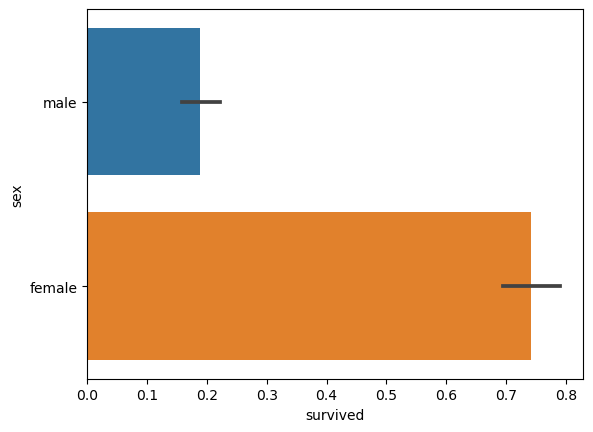

In [63]:
sns.barplot(x='survived', y='sex',data=df);

# Q10: Draw catplot represents survived people based on embarked

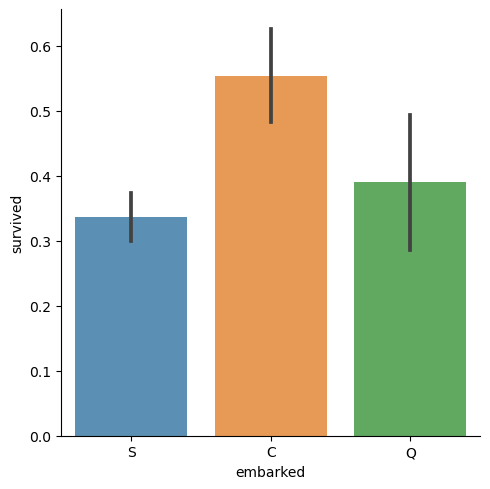

In [68]:
g = sns.catplot(
    data=df, # Data
    kind="bar", # Chart to use
    x="embarked", # X axis
    y="survived", # y axis
    alpha=.8, # adjust transparancy
    height=5
)

# Q11: Draw boxplot represents distribution of male and female based on age and pclass

<AxesSubplot:xlabel='pclass', ylabel='age'>

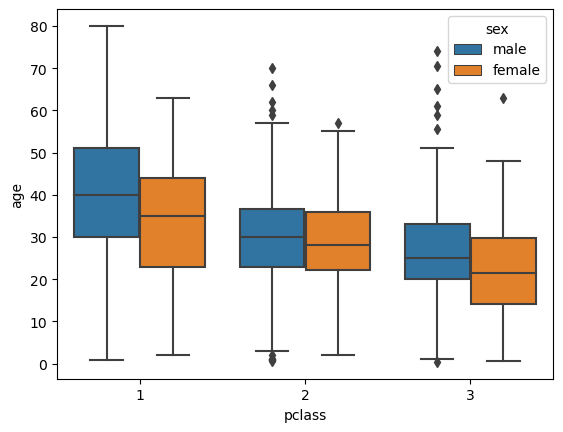

In [74]:
sns.boxplot( x="pclass",  y="age", hue="sex", data=df)

# Q12: Draw heatmap represents correlations between sibsp, parch, age, fare, and survived columns

<AxesSubplot:>

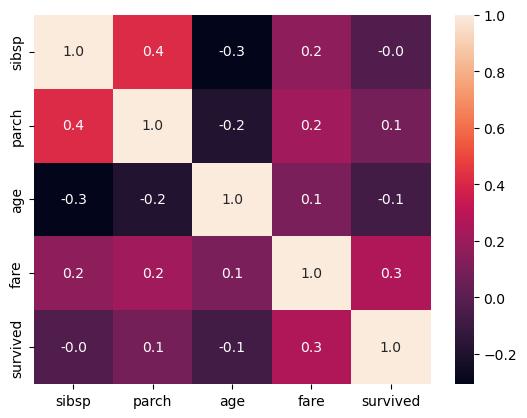

In [77]:
df3=df[['sibsp', 'parch', 'age', 'fare','survived']]
sns.heatmap(df3.corr(),annot=True,fmt='.1f')


<AxesSubplot:>

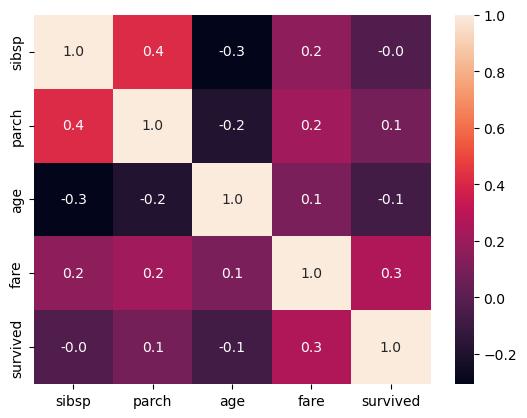

In [79]:
sns.heatmap(df[['sibsp', 'parch', 'age', 'fare','survived']].corr(),annot=True,fmt='.1f')

# Q13: Draw factorplot represents the relation between sibsp and survived columns

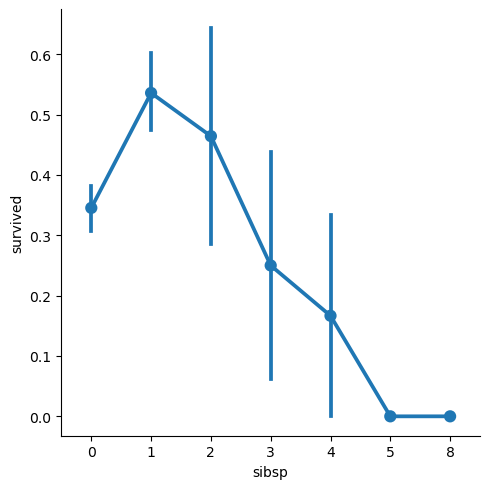

In [82]:
sns.factorplot(x = "sibsp", y = "survived",data = df);

# Q14: Draw extra insights [Optional]

/Users/razanalyahya/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age', ylabel='sex'>

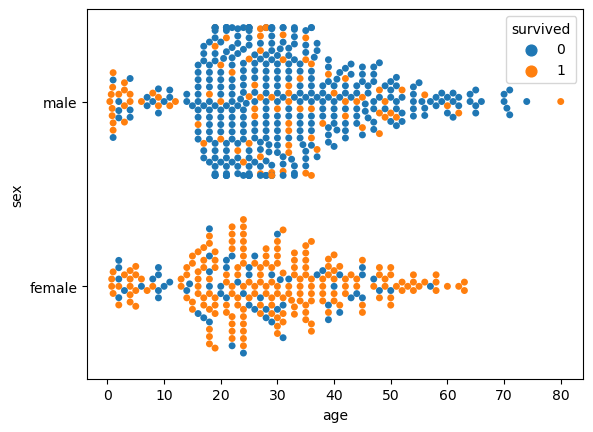

In [84]:
sns.swarmplot(
    x="age",
    y="sex", 
    hue="survived", 
    data=df
)